In [193]:
import pandas as pd

# Import data train.csv into a DataFrame and display the first few records
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [194]:
# Check for the presence of missing values in the set (if there are gaps, they should be processed).
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [195]:
# Analyze what information is in the casual, registered and count columns.
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [196]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Столбцы «Casual» и «Registered» не следует рассматривать в прогнозном анализе, поскольку столбец «Count» представляет собой сумму обоих столбцов.

In [197]:
# Convert datatime columns to datetime64
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [198]:
# Create two new fields containing the month and hour. Delete the date column.
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df.drop(['datetime'], axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


In [199]:
# Divide the original dataset into training and test sets in such a way that earlier data are used for training, and later ones are used to check the quality of the model. Use the last 1000 records for verification, the rest for training.
df_train = df[:1000]
df_test = df[1000:]

In [200]:
# Separate the values of the target feature into a separate object (both for the training and for the test set). Remove the corresponding column from the training and test sets.
df_train_target = df_train['count']
df_train.drop(['count'], axis=1, inplace=True)
df_test_target = df_test['count']
df_test.drop(['count'], axis=1, inplace=True)

C:\Users\Porti\AppData\Local\Temp\ipykernel_9504\602462384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['count'], axis=1, inplace=True)
C:\Users\Porti\AppData\Local\Temp\ipykernel_9504\602462384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['count'], axis=1, inplace=True)


In [201]:
df_train_target

0      16
1      40
2      32
3      13
4       1
       ..
995    63
996    44
997    52
998    39
999    32
Name: count, Length: 1000, dtype: int64

In [202]:
# Separate features of binary, numerical and categorical features:

# binary features do not need to be transformed (only separated);
# numerical features - separate and scale (the StandardScaler method from the preprocessing module);
# categorical features - separate and apply binary coding.

In [203]:
# Separate the binary features.
df_train_binary = df_train[['workingday', 'atemp', 'holiday']]
df_test_binary = df_test[['workingday', 'atemp', 'holiday']]

In [204]:
# Separate the numerical features and scale them. Use the StandardScaler method from the preprocessing module.
df_train_numerical = df_train[['temp', 'humidity', 'windspeed']]
df_test_numerical = df_test[['temp', 'humidity', 'windspeed']]

In [205]:
# Scale the numerical features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_train_numerical)
df_train_numerical = scaler.transform(df_train_numerical)
df_test_numerical = scaler.transform(df_test_numerical)

In [206]:
# Separate the categorical features and apply binary coding.
df_train_categorical = df_train[['season', 'month', 'hour']]
df_test_categorical = df_test[['season', 'month', 'hour']]

In [207]:
# Apply binary coding to the categorical features.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train_categorical = df_train_categorical.apply(le.fit_transform)
df_test_categorical = df_test_categorical.apply(le.fit_transform)

In [208]:
# Convert the features from numpy arrays to pandas dataframes.
df_train_binary = pd.DataFrame(df_train_binary)
df_test_binary = pd.DataFrame(df_test_binary)
df_train_numerical = pd.DataFrame(df_train_numerical, columns=['temp', 'humidity', 'windspeed'], dtype=float)
df_test_numerical = pd.DataFrame(df_test_numerical, columns=['temp', 'humidity', 'windspeed'], dtype=float)
df_train_categorical = pd.DataFrame(df_train_categorical)
df_test_categorical = pd.DataFrame(df_test_categorical)

In [209]:
# Concatenate the binary, numerical and categorical features. the order of the columns must be preserved.
df_train = pd.concat([df_train_binary, df_train_numerical, df_train_categorical], axis=1)
df_test = pd.concat([df_test_binary, df_test_numerical, df_test_categorical], axis=1)

In [210]:
df_train

,workingday,atemp,holiday,temp,humidity,windspeed,season,month,hour
0,0,14.395,0,-0.092454,1.278751,-1.545165,0,0,0
1,0,13.635,0,-0.278105,1.229779,-1.545165,0,0,1
2,0,13.635,0,-0.278105,1.229779,-1.545165,0,0,2
3,0,14.395,0,-0.092454,0.984920,-1.545165,0,0,3
4,0,14.395,0,-0.092454,0.984920,-1.545165,0,0,4
...,...,...,...,...,...,...,...,...,...
995,0,21.210,0,1.578401,1.082864,0.536748,0,2,22
996,0,21.970,0,1.764051,1.082864,0.536748,0,2,23
997,0,21.210,0,1.578401,1.082864,0.953130,0,2,0
998,0,21.210,0,1.578401,1.082864,0.432826,0,2,1


In [211]:
df_train.isnull().sum()

workingday    0
atemp         0
holiday       0
temp          0
humidity      0
windspeed     0
season        0
month         0
hour          0
dtype: int64

In [212]:
# create a linear regression model for the transformed dataset.
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_train, df_train_target)

LinearRegression()

In [213]:
# Evaluate the quality of the resulting model on test data using the MAE metric.
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(df_test_target[:5000], lin_reg.predict(df_test[:5000])))

109.79330179785723


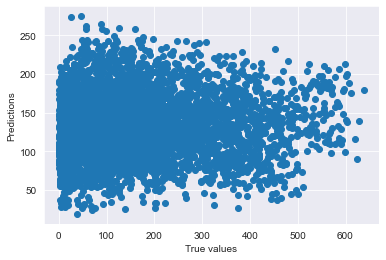

In [214]:
# display a cloud of points in the coordinates “true values of the objective function” - “values predicted by the model”. The points are colored according to the quality of the model.


import matplotlib.pyplot as plt

plt.scatter(df_test_target[:5000], lin_reg.predict(df_test[:5000]))
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()